### Computer Vision Basics

Warm up with some manual calculations.

Consider this matrix that represents a small 6x6 pixel image. Pixel value 255 would represent black and 0 represent white. 

|   |   |   |   |   |   |
|---|---|---|---|---|---|
|255|255|255|255|255|255|
|255|255|255|255|255|255|
|255|255|255|255|255|255|
| 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 |  
| 0 | 0 | 0 | 0 | 0 | 0 |

What is the output if the filters (Sobels) below is applied to the above image? How is the filter applied? Calculate the output of it manually.

Prewitt Filter

|  |   | |
| --  |--   |--  |
|-1 | 0 | 1|
| -1 | 0   |1  |
|-1 | 0 | 1|

Prewitt Filter

|  |   | |
| --  |--   |--  |
|1 | 1 | 1|
| 0 | 0   | 0  |
|-1 | -1 | -1|
  
## Question
1. What is the function of such filters?

Let's try some code .. what does the code do?

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io, data
import matplotlib.cm as cm

Matplotlib is building the font cache; this may take a moment.


In [21]:
img=np.array([[255,255,255,255],[255,255,255,255],[255,255, 255,255],
              [255,255,255,255],
             [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])                   
output = np.zeros (img.shape)

kernel = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]])

for row in range(1, img.shape[0] - 1):
    for col in range(1, img.shape[1] - 1):
        value = kernel * img[(row - 1):(row + 2), (col - 1):(col + 2)]
        output[row, col] = value.sum ()
print(output)

[[   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0. -765. -765.    0.]
 [   0. -765. -765.    0.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]
 [   0.    0.    0.    0.]]


In [38]:
img.shape

(8, 4)

In [35]:
kernel = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]])

print(img[0:3,0:3])

print(img[0:3,0:3]*kernel)

print(kernel*img[(row - 1):(row + 2), (col - 1):(col + 2)])

[[255 255 255]
 [255 255 255]
 [255 255 255]]
[[-255 -255 -255]
 [   0    0    0]
 [ 255  255  255]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


Let's pad the image so that the filter (kernel) can be applied to all pixels. Why do we pad it?

In [40]:
print(img.shape)
mg=np.pad(img,((2,2),(2,2)),'edge')
print(img)
print(mg)

(8, 4)
[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
[[255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


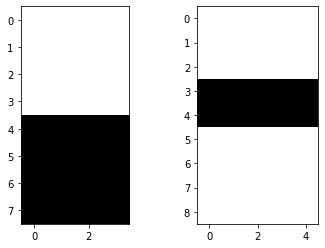

[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
[[   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [-765. -765. -765. -765. -765.]
 [-765. -765. -765. -765. -765.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]


In [23]:
img=np.array([[255,255, 255,255],[255,255,255,255],[255,255, 255,255],
              [255,255,255,255],
             [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
kernel = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]])
def filter(img,kernel):
    img=np.pad(img,((2,2),(2,2)),'edge')
    output = np.zeros (img.shape)
    for row in range(1, img.shape[0] - 1):
        for col in range(1, img.shape[1] - 1):
            value = kernel * img[(row - 1):(row + 2), (col - 1):(col + 2)]
            output[row-1, col-1] = value.sum ()
    return output[1:-2,1:-2]

emg=filter(img,kernel)

fig,ax=plt.subplots(1,2)
ax[0].imshow(img,cmap=cm.gray)
ax[1].imshow(emg,cmap=cm.gray)
plt.show()

print(img)
print(emg)


Rotate the input image and try again ..

[[255 255 255 255   0   0   0   0]
 [255 255 255 255   0   0   0   0]
 [255 255 255 255   0   0   0   0]
 [255 255 255 255   0   0   0   0]]


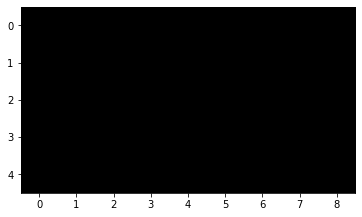

In [24]:
kernel = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]])
imgT=img.T
print(imgT)
outT=filter(imgT,kernel)
plt.imshow(outT, cmap=cm.gray)
plt.show()

[[-255. -255. -255. -765. -765.    0.    0.    0.    0.]
 [-255. -255. -255. -765. -765.    0.    0.    0.    0.]
 [-255. -255. -255. -765. -765.    0.    0.    0.    0.]
 [-255. -255. -255. -765. -765.    0.    0.    0.    0.]
 [-255. -255. -255. -765. -765.    0.    0.    0.    0.]]


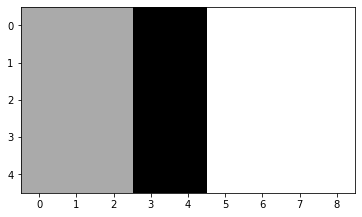

In [39]:
kernel2 = np.array([
    [-1, 0, 1], 
    [-1, 0, 0], 
    [-1, 0, 1]])
outT=filter(imgT,kernel2)
print(outT)
plt.imshow(outT, cmap=cm.gray)
plt.show()

Let's use a proper image instead of constructed pixels... Explain the results.

In [7]:
kernel = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]])
kernel2 = np.array([
    [-1, 0, 1], 
    [-1, 0, 1], 
    [-1, 0, 1]])
img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2) #convert to black and white first
emg1=filter(img2,kernel)
emg2=filter(img2,kernel2)


In [8]:
print(emg1)

[[  0.   0.   0. ...   0.   0.   0.]
 [176. 171. 155. ...  93.  98. 102.]
 [176. 171. 154. ... 116. 113. 114.]
 ...
 [  1.   0.  -1. ...   0.   2.   3.]
 [ -1.   0.   2. ...   0.   2.   3.]
 [  0.   0.   0. ...   0.   0.   0.]]


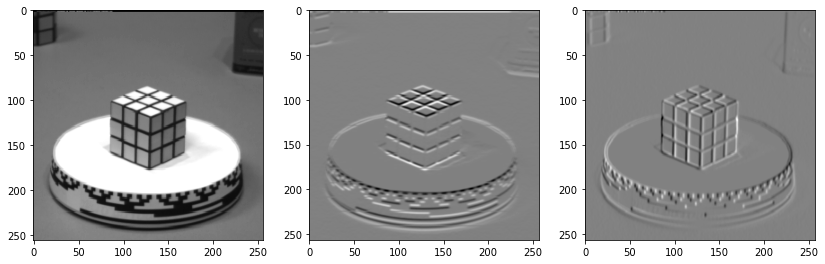

In [9]:
fig,ax=plt.subplots(1,3, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(emg1,cmap=cm.gray)
ax[2].imshow(emg2,cmap=cm.gray)
plt.show()

Try to change the threshold value below ..

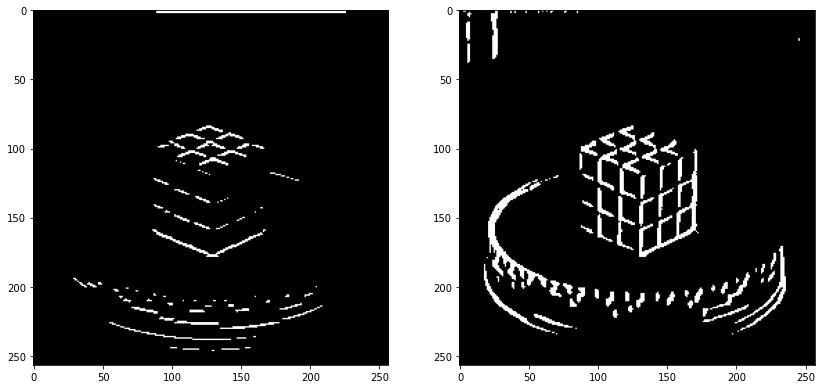

In [11]:
import cv2 as cv
ret,thresh1 = cv.threshold(emg1,200,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(emg2,50,255,cv.THRESH_BINARY)
fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(thresh1,cmap=cm.gray)
ax[1].imshow(thresh2,cmap=cm.gray)
plt.show()

Try out these filters with this image (of course exclude those that was tried above).
![](img/f1.png)
![](img/f2.png)
![](img/f3.png)
![](img/rubic.jpg)

### Question
1. What did those filter do in general?
1. Create a Laplacian kernel and apply it to any image. What do the results show?

1.edge detection  
2.Laplacian edge detection  

<ipython-input-7-25bc310b22ee>:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


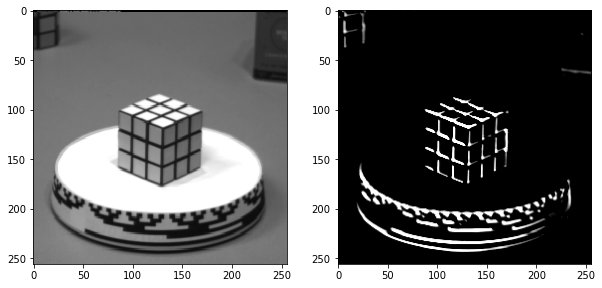

In [7]:
#Q1
#edge detection
import cv2 as cv
kernel1 = np.array([[1, -.32, 1, 1, 1],
                   [-1, -0.78,.92,1, 1],
                   [-1, -1,0,1, 1],
                   [-1, -1,-.92,-.78,1],
                   [-1, -1,-1,-.32,-1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel1) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-6-17c210c1170a>:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


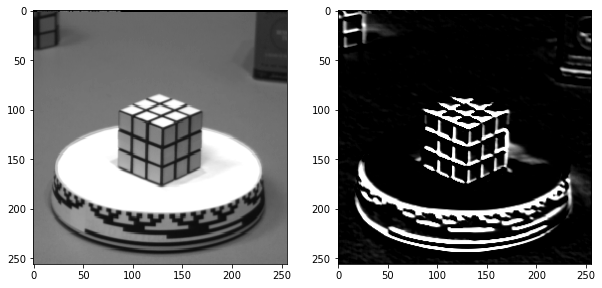

In [6]:
#Q1
#edge detection
import cv2 as cv
kernel1 = np.array([[1, 1, 1, 1, 1],
                   [-.32, 0.78,1,1, 1],
                   [-1, -0.92,0,0.92, 1],
                   [-1, -1,-1,-.78,.32],
                   [-1, -1,-1,-1,-1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel1) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-21-9a60b4216da1>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


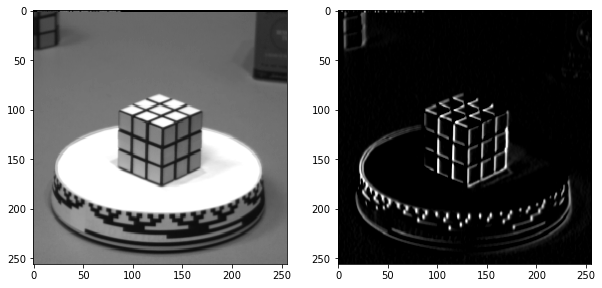

In [21]:
#Q1
#edge detection
import cv2 as cv
kernel1 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel1) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-26-d4f3a6e4873f>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


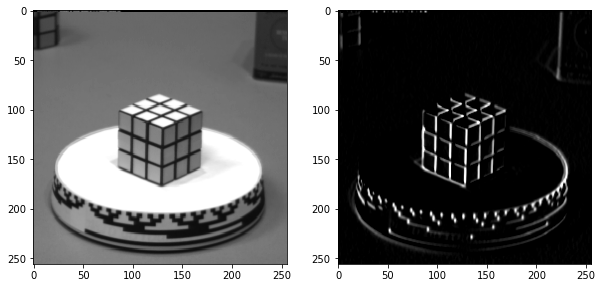

In [26]:
#Q1
#edge detection
import cv2 as cv
kernel1 = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel1) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-25-bd16109cd312>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


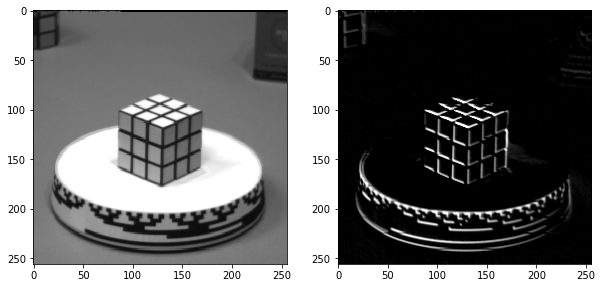

In [25]:
#Q1
import cv2 as cv
kernel2 = np.array([[0, 1, 1],
                   [-1, 0, 1],
                   [-1, -1, 0]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-8-cf736347e2e1>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


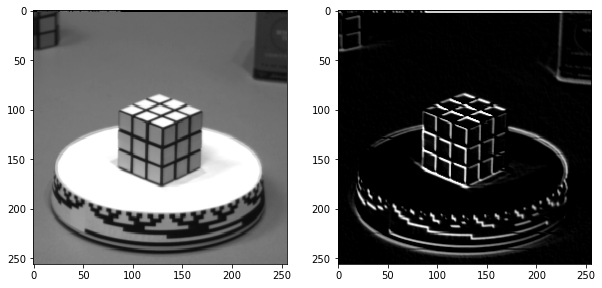

In [8]:
#Q1
import cv2 as cv
kernel2 = np.array([[0, -1, -1],
                   [1, 0, -1],
                   [1, 1, 0]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-23-a732d684f3b4>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


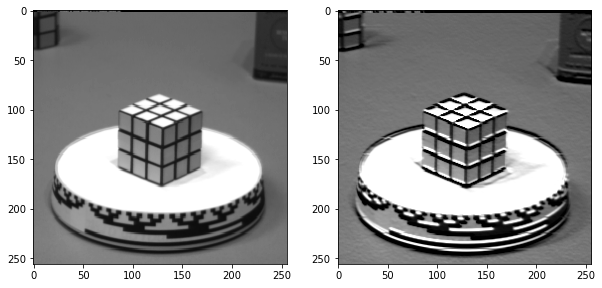

In [23]:
#Q1
import cv2 as cv
kernel2 = np.array([[1, 1, 1],
                   [0, 0, 1],
                   [-1, -1, -1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

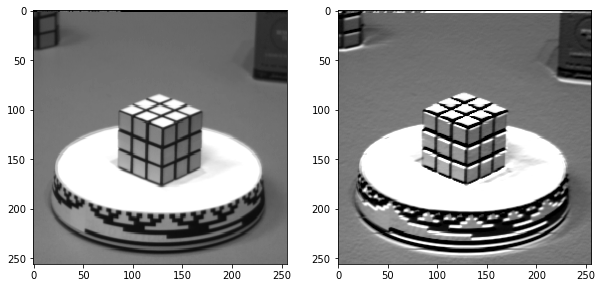

In [5]:
#Q1
import cv2 as cv
kernel2 = np.array([[-1, -1, -1],
                   [0, 0, 1],
                   [1, 1, 1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-24-befd1d8e7ce8>:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


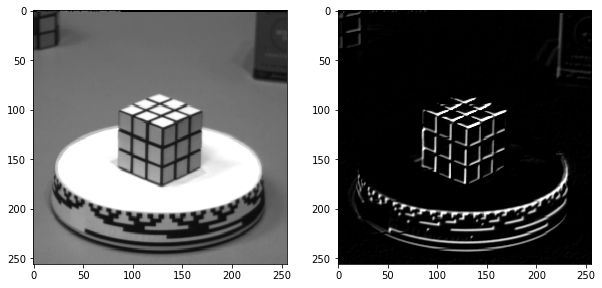

In [24]:
#Q1
import cv2 as cv
kernel2 = np.array([[1, 1, 0],
                   [1, 0, -1],
                   [0, -1, -1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

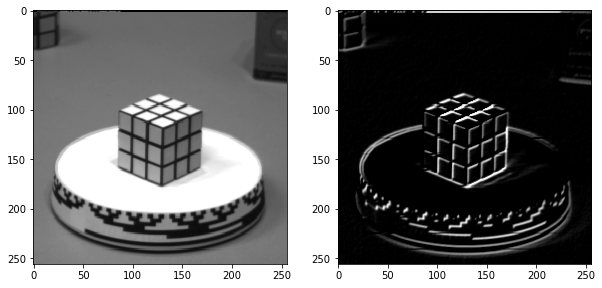

In [6]:
#Q1
import cv2 as cv
kernel2 = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel2) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[10,10])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

<ipython-input-9-66b5dd207680>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


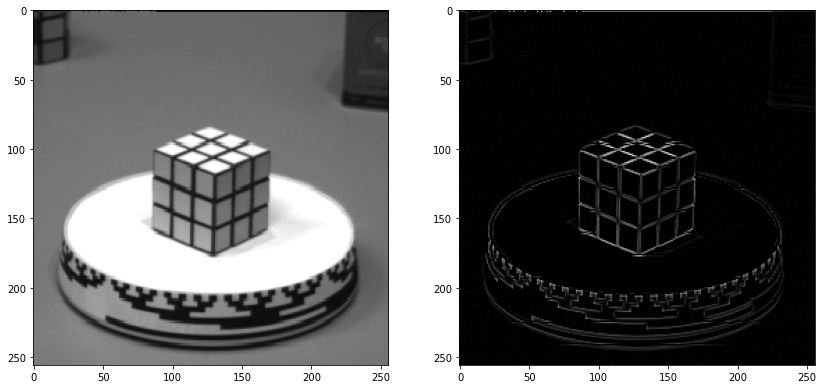

In [9]:
#Q2
#Laplacian kernel
import cv2 as cv
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

Creating such filters is a common operation in Computer Vision. There is a built-in function in openCV for it. You can define the mask (kernel or filter) as such:

     # kernel should be floating point type
     kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]], np.float32)  
                       
Then call the filter2D function to apply it.  

### Question
1. What does the above kernel do? What is the name of this kernel (or filter)? Try a larger matrix, say 5x5.

1. what does this kernel below do? If the effects are not clear enlarge it to 5x5 pixels and divide by 25, or even larger like 7x7

        kernel = np.array([[1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1],
                       [1, 1, 1, 1]], np.float32) /16
              

<ipython-input-8-015c22006998>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img2 = color.rgb2gray(img2)


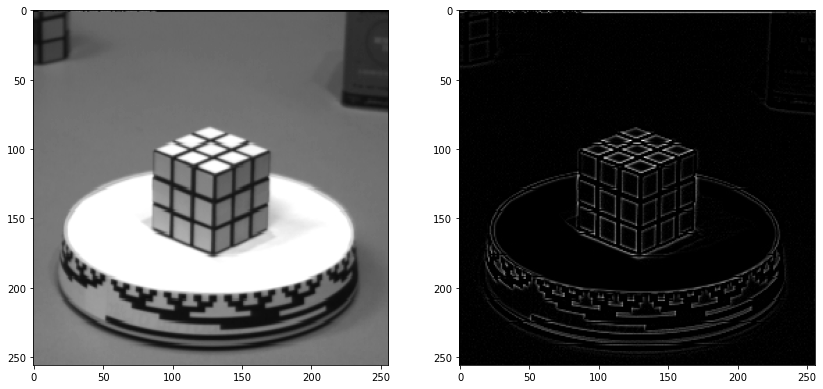

In [8]:
#Q1
#detect edge
#Laplacian kernel
import cv2 as cv
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]], np.float32) 

img2=io.imread('img/rubic.jpg') #if you want to read from file
#img2=data.camera() # or use built-in image
img2 = color.rgb2gray(img2)
out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

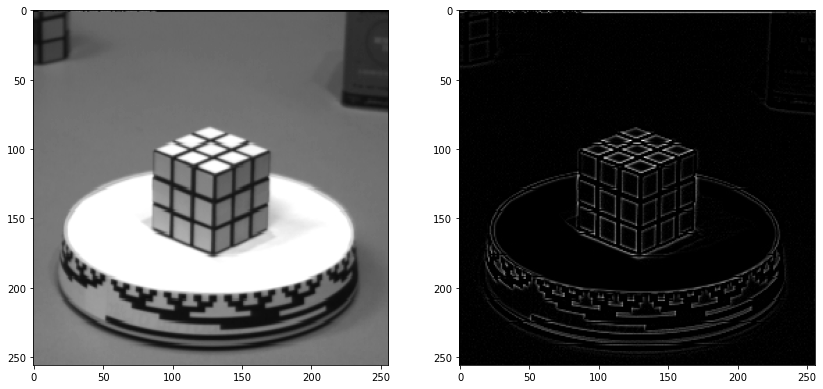

In [9]:
#Q1
#Laplacian kernel 5X5
Laplacian_kernel=np.array([[0,0,-1,0,0],
                         [0,-1,-2,-1,0],
                         [-1,-2,16,-2,-1],
                         [0,-1,-2,-1,0],
                         [0,0,-1,0,0]],np.float32)

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

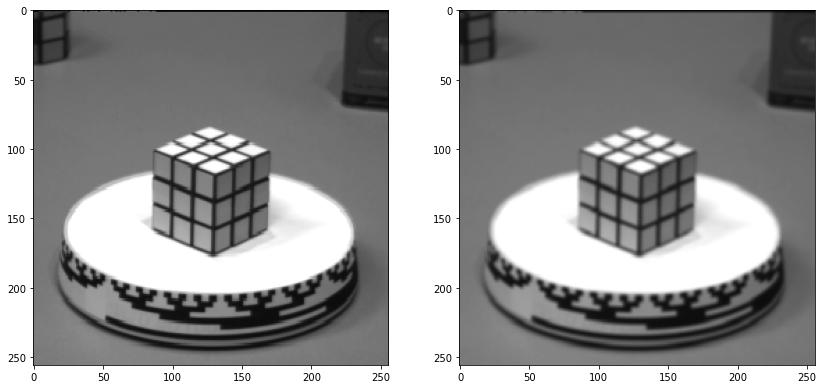

In [60]:
#Q2
#Box blur
kernel = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]],np.float32)/9

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

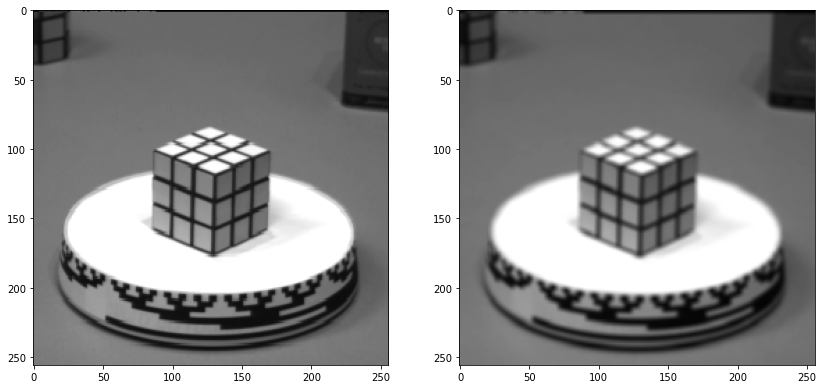

In [44]:
#Q2
kernel = np.array([[1, 1, 1, 1],
                [1, 1, 1, 1],
                [1, 1, 1, 1],
                [1, 1, 1, 1]], np.float32) /16

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

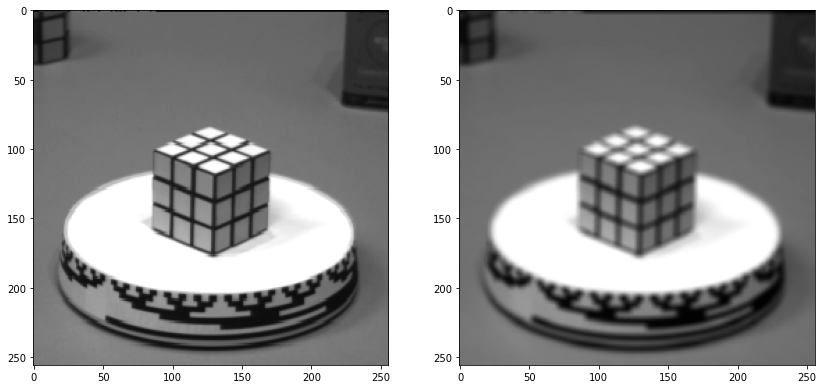

In [46]:
#Q2
#5x5 pixels and divide by 25
kernel = np.array([[1, 1, 1, 1,1],
                       [1, 1, 1, 1,1],
                       [1, 1, 1, 1,1],
                       [1, 1, 1, 1,1],
                       [1, 1, 1, 1,1]], np.float32) /25

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

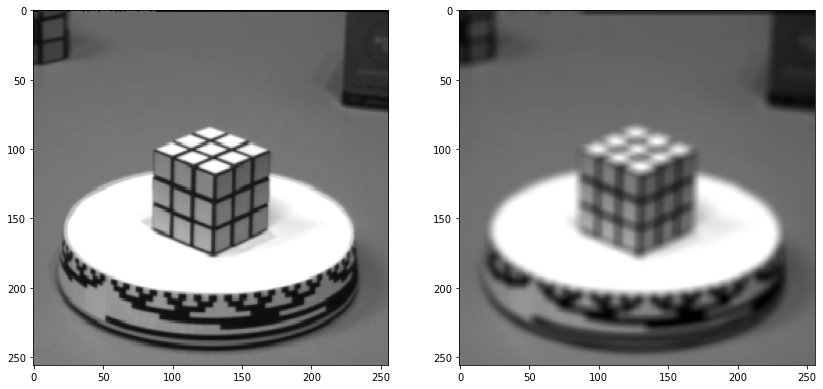

In [47]:
#Q2
#7x7 pixels and divide by 49
kernel = np.array([[1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1],
                       [1, 1, 1, 1,1,1,1]],np.float32) /49

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()

### Question
1. Find out what other types of spatial filters are available? What can they do?

Finally in case you are not aware these filter operation is a **convolution** operation. 

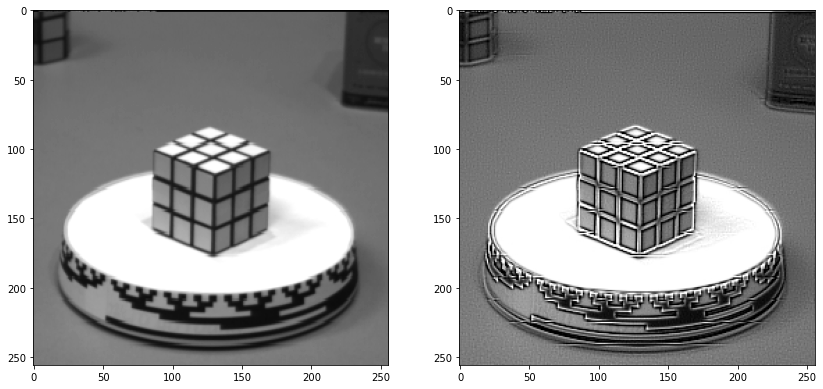

In [11]:
#Use the kernal below to sharpen the picture
#The sharpened kernel is actually a slight Sobel filter
kernel = np.array([[1, 1, 1],
                [1, -7, 1],
                [1, 1, 1]],np.float32)

out = cv.filter2D(img2, -1, kernel) # -1, means output has depth same as input

fig,ax=plt.subplots(1,2, figsize=[14,14])
ax[0].imshow(img2,cmap=cm.gray)
ax[1].imshow(out,cmap=cm.gray)
plt.show()